In [30]:
import torch
import torchvision
import torchvision.transforms as transforms

In [31]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


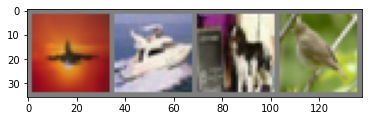

plane  ship   dog  bird


In [32]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [45]:
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 30, 3)
        self.fc1 = nn.Linear(30 * 2 * 2, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # print(x.size())
        x = x.view(-1, 30 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net.to(device)

print(len(list(net.parameters())))

12


In [46]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [52]:
import time

t0 = time.time()


for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            print("Time elapsed = {}".format(time.time()-t0))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.325
Time elapsed = 17.282971143722534
[1,  4000] loss: 1.322
Time elapsed = 28.83591628074646
[1,  6000] loss: 1.303
Time elapsed = 42.21151280403137
[1,  8000] loss: 1.266
Time elapsed = 53.459325075149536
[1, 10000] loss: 1.265
Time elapsed = 65.87651109695435
[1, 12000] loss: 1.275
Time elapsed = 75.88120818138123
[2,  2000] loss: 1.222
Time elapsed = 94.14403319358826
[2,  4000] loss: 1.191
Time elapsed = 104.08202886581421
[2,  6000] loss: 1.213
Time elapsed = 114.77516007423401
[2,  8000] loss: 1.199
Time elapsed = 124.70158314704895
[2, 10000] loss: 1.192
Time elapsed = 135.95661997795105
[2, 12000] loss: 1.196
Time elapsed = 147.18971824645996
[3,  2000] loss: 1.146
Time elapsed = 164.2978880405426
[3,  4000] loss: 1.140
Time elapsed = 175.02145385742188
[3,  6000] loss: 1.160
Time elapsed = 185.69402408599854
[3,  8000] loss: 1.145
Time elapsed = 196.1175413131714
[3, 10000] loss: 1.136
Time elapsed = 206.83670091629028
[3, 12000] loss: 1.115
Time elapsed = 

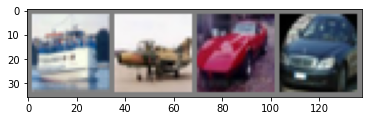

GroundTruth:   ship plane   car   car
Predicted:   ship truck   car   car


In [97]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images.to('cuda'))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [93]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

tensor([[-0.7208, -0.0192, -0.0384,  1.7784, -0.7253, -0.2240,  0.3031, -0.9916,
          2.0435, -0.4863],
        [ 5.2759,  7.4920, -4.3926, -0.3608, -3.5671, -5.0062, -6.2730, -4.4516,
          9.5882,  4.5282],
        [ 1.7596, -0.0278,  0.5562,  0.1684, -0.4691, -1.0820, -2.3051, -1.2486,
          3.1202,  0.9764],
        [ 5.2969, -0.3231,  2.6010,  0.0853,  0.8604, -3.7491, -2.1154, -3.7699,
          4.3286, -0.5650]], device='cuda:0', grad_fn=<AddmmBackward>)
Predicted:   ship  ship  ship plane


In [55]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels.to(device)).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 66 %
Accuracy of   car : 76 %
Accuracy of  bird : 38 %
Accuracy of   cat : 59 %
Accuracy of  deer : 54 %
Accuracy of   dog : 51 %
Accuracy of  frog : 61 %
Accuracy of horse : 56 %
Accuracy of  ship : 75 %
Accuracy of truck : 75 %
